### Import les libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


### Lire les données

0: femmes + hommes                                                                                                                                                                                      
1: hommes                                                                                                                                                                                                  
2: femmes

In [2]:
df = pd.read_csv("files/reduced_covid_sexe.csv")
metadata = pd.read_csv("files/metadata_covid_sexe.csv",encoding="latin-1",delimiter=';')
pd.set_option('display.max_colwidth', None)
#departement = pd.read_json("departements.json")

### Le traitement des données


Afficher les 15 premières lignes du tableau covid_sexe.csv. (df.head?)


In [3]:
df.head(15)

,Unnamed: 0,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2
0,sexe,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0
1,jour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-18,2972.0,1685.0,1248.0,771.0,525.0,239.0,816.0,432.0,379.0,218.0,121.0,96.0
3,2020-03-19,4073.0,2256.0,1632.0,1002.0,689.0,284.0,1180.0,580.0,562.0,327.0,179.0,136.0
4,2020-03-20,5226.0,2912.0,2134.0,1297.0,905.0,362.0,1587.0,777.0,764.0,450.0,250.0,190.0
5,2020-03-21,5900.0,3298.0,2401.0,1453.0,1018.0,401.0,1811.0,881.0,888.0,525.0,297.0,219.0
6,2020-03-22,6954.0,3906.0,2815.0,1674.0,1176.0,461.0,2117.0,1031.0,1040.0,632.0,356.0,263.0
7,2020-03-23,8673.0,4882.0,3532.0,2080.0,1465.0,569.0,2567.0,1270.0,1247.0,860.0,497.0,350.0
8,2020-03-24,10163.0,5843.0,4149.0,2503.0,1773.0,694.0,3281.0,1609.0,1624.0,1100.0,661.0,425.0
9,2020-03-25,12072.0,7064.0,4856.0,2935.0,2127.0,785.0,4085.0,2000.0,2028.0,1388.0,818.0,557.0


Afficher les 15 dernières lignes du tableau covid_sexe.csv. (df.tail?)


In [4]:
df.tail(15)

,Unnamed: 0,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2
1096,2023-03-17,13279.0,5982.0,7058.0,755.0,461.0,285.0,858444.0,419559.0,430886.0,135726.0,77437.0,57233.0
1097,2023-03-18,13205.0,5973.0,6995.0,752.0,462.0,282.0,858672.0,419653.0,431016.0,135737.0,77441.0,57240.0
1098,2023-03-19,13211.0,5979.0,6995.0,754.0,463.0,283.0,858680.0,419655.0,431022.0,135737.0,77441.0,57240.0
1099,2023-03-20,13358.0,6052.0,7068.0,760.0,469.0,282.0,859128.0,419870.0,431252.0,135787.0,77467.0,57264.0
1100,2023-03-21,13434.0,6083.0,7109.0,761.0,463.0,289.0,859586.0,420088.0,431488.0,135822.0,77489.0,57276.0
1101,2023-03-22,13418.0,6088.0,7090.0,761.0,469.0,283.0,860128.0,420329.0,431778.0,135835.0,77495.0,57283.0
1102,2023-03-23,13025.0,5912.0,6870.0,739.0,456.0,273.0,860867.0,420652.0,432187.0,135860.0,77512.0,57291.0
1103,2023-03-24,13103.0,5937.0,6917.0,751.0,466.0,275.0,861310.0,420874.0,432408.0,135875.0,77521.0,57297.0
1104,2023-03-25,13038.0,5902.0,6890.0,744.0,463.0,271.0,861538.0,420987.0,432518.0,135889.0,77527.0,57305.0
1105,2023-03-26,13036.0,5903.0,6889.0,746.0,466.0,270.0,861565.0,420997.0,432534.0,135894.0,77530.0,57307.0


Afficher les dataframe du metadata_sexe ? a quoi sert t'il ?

Il est utilisé pour comprendre le type des données de chaque colonne.

In [5]:
metadata

,Colonne,Type,Description_FR,Description_EN,Exemple
0,dep,integer,DÃ©partement,Department,1
1,sexe,integer,Sexe,Sex,0
2,jour,string($date),Date de notification,Date of notice,18/03/2020
3,hosp,integer,Nombre de personnes actuellement hospitalisées,Number of people currently hospitalized,2
4,rea,integer,Nombre de personnes actuellement en services de réanimation ou soins intensifs,Number of people currently in resuscitation or critical care,0
5,rad,integer,Nombre cumulé de personnes retournées à domicile,Total amount of patient that returned home,1
6,dc,integer,Nombre cumulé de personnes décédées à l'hôpital,Total amout of deaths at the hospital,0
7,ssr_usld,integer,Nombre de personnes actuellement en services de SSR ou USLD,NaN,NaN
8,hospconv,integer,Nombre de personnes actuellement en services d'hospitalisation conventionnelle,NaN,NaN
9,autres,integer,Nombre de personnes actuellement en autres types de services,NaN,NaN


Quelle est la période temporelle sur laquelle s'étendent les données ?

Du 18-03-2020 à 31-03-2023

In [6]:
df.rename(columns={'Unnamed: 0':'Jour'},inplace=True)
df.sort_values(by='Jour')

,Jour,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2
2,2020-03-18,2972.0,1685.0,1248.0,771.0,525.0,239.0,816.0,432.0,379.0,218.0,121.0,96.0
3,2020-03-19,4073.0,2256.0,1632.0,1002.0,689.0,284.0,1180.0,580.0,562.0,327.0,179.0,136.0
4,2020-03-20,5226.0,2912.0,2134.0,1297.0,905.0,362.0,1587.0,777.0,764.0,450.0,250.0,190.0
5,2020-03-21,5900.0,3298.0,2401.0,1453.0,1018.0,401.0,1811.0,881.0,888.0,525.0,297.0,219.0
6,2020-03-22,6954.0,3906.0,2815.0,1674.0,1176.0,461.0,2117.0,1031.0,1040.0,632.0,356.0,263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,2023-03-29,13184.0,5989.0,6964.0,734.0,456.0,270.0,862962.0,421645.0,433268.0,136009.0,77594.0,57356.0
1109,2023-03-30,13186.0,5953.0,7003.0,732.0,459.0,267.0,863331.0,421833.0,433447.0,136045.0,77609.0,57376.0
1110,2023-03-31,13149.0,5919.0,6997.0,709.0,446.0,258.0,863837.0,422089.0,433693.0,136076.0,77630.0,57385.0
1,jour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dtypes

Jour       object
hosp      float64
hosp.1    float64
hosp.2    float64
rea       float64
rea.1     float64
rea.2     float64
rad       float64
rad.1     float64
rad.2     float64
dc        float64
dc.1      float64
dc.2      float64
dtype: object

Sur combien de jours s'étale les données ? années ?

1109 jours


In [55]:
df_new = df.loc[:,['Jour']]
df_new.loc[2:,['Jour']]
# pd.to_datetime(df_new.loc[2:,['Jour']],format='%Y-%m-%d')
df_new.loc[2:,['Jour']].apply(pd.to_datetime)

,Jour
2,2020-03-18
3,2020-03-19
4,2020-03-20
5,2020-03-21
6,2020-03-22
...,...
1106,2023-03-27
1107,2023-03-28
1108,2023-03-29
1109,2023-03-30


In [8]:
df.loc[2:,['Jour']] = df.loc[2:,['Jour']].apply(pd.to_datetime)
dates = df.loc[2:,['Jour']].apply(pd.to_datetime)


In [9]:
date_range = (dates.max() - dates.min()).dt.days
n_days = date_range + 1

Dessiner un Heatmap des corrélations des caractéristiques qui vous semblent pertinentes d'observer ? Discuter les résultats


<Axes: >

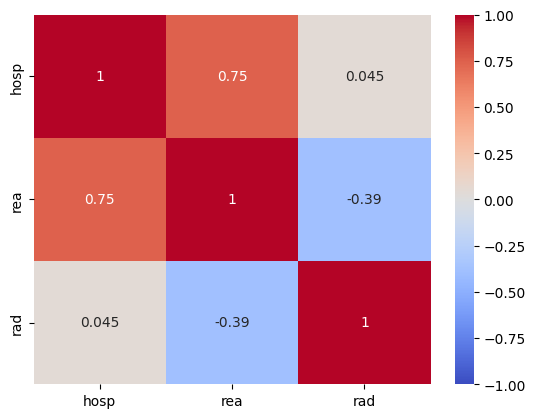

In [10]:
# df.loc[2:,['hosp','rea','rad','dc']].style.background_gradient(cmap='viridis')
# heatmap correlation
data = df.loc[2:,['hosp','rea','rad']]
data.corr()

sns.heatmap(data.corr(),vmin = -1, vmax = +1,annot=True,cmap='coolwarm')

Tracer l'evolution sur un même graphique des hospitalisations et des réanimations, pour les Femmes et pour les hommes. Discuter les résultats


In [22]:
df.head()

,Jour,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2,p_h_dc,p_f_dc
0,sexe,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,NaN,NaN
1,jour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-18 00:00:00,2972.0,1685.0,1248.0,771.0,525.0,239.0,816.0,432.0,379.0,218.0,121.0,96.0,0.000356,0.000282
3,2020-03-19 00:00:00,4073.0,2256.0,1632.0,1002.0,689.0,284.0,1180.0,580.0,562.0,327.0,179.0,136.0,0.000526,0.000400
4,2020-03-20 00:00:00,5226.0,2912.0,2134.0,1297.0,905.0,362.0,1587.0,777.0,764.0,450.0,250.0,190.0,0.000735,0.000559


In [40]:
df.columns
df.head()
df_graphe = df.loc[2:,['Jour','hosp.1','hosp.2','rea.1','rea.2']]
df_graphe['Jour']

2       2020-03-18 00:00:00
3       2020-03-19 00:00:00
4       2020-03-20 00:00:00
5       2020-03-21 00:00:00
6       2020-03-22 00:00:00
               ...         
1106    2023-03-27 00:00:00
1107    2023-03-28 00:00:00
1108    2023-03-29 00:00:00
1109    2023-03-30 00:00:00
1110    2023-03-31 00:00:00
Name: Jour, Length: 1109, dtype: object

In [38]:
df_graphe.loc[:,['Jour']]

,Jour
2,2020-03-18 00:00:00
3,2020-03-19 00:00:00
4,2020-03-20 00:00:00
5,2020-03-21 00:00:00
6,2020-03-22 00:00:00
...,...
1106,2023-03-27 00:00:00
1107,2023-03-28 00:00:00
1108,2023-03-29 00:00:00
1109,2023-03-30 00:00:00


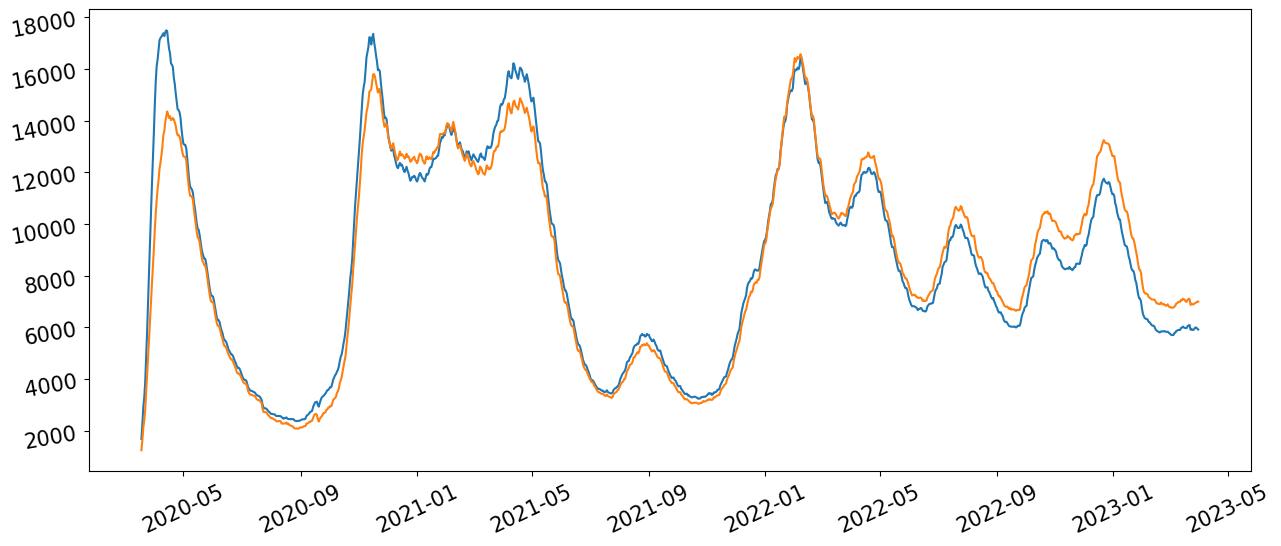

In [34]:


plt.figure(figsize=(15,6))
plt.plot(df_graphe.loc[:,['Jour']],df_graphe.loc[:,['hosp.1']])
plt.plot(df_graphe.loc[:,['Jour']],df_graphe.loc[:,['hosp.2']])
plt.xticks(rotation = 25)
plt.yticks(rotation=10)
plt.show()

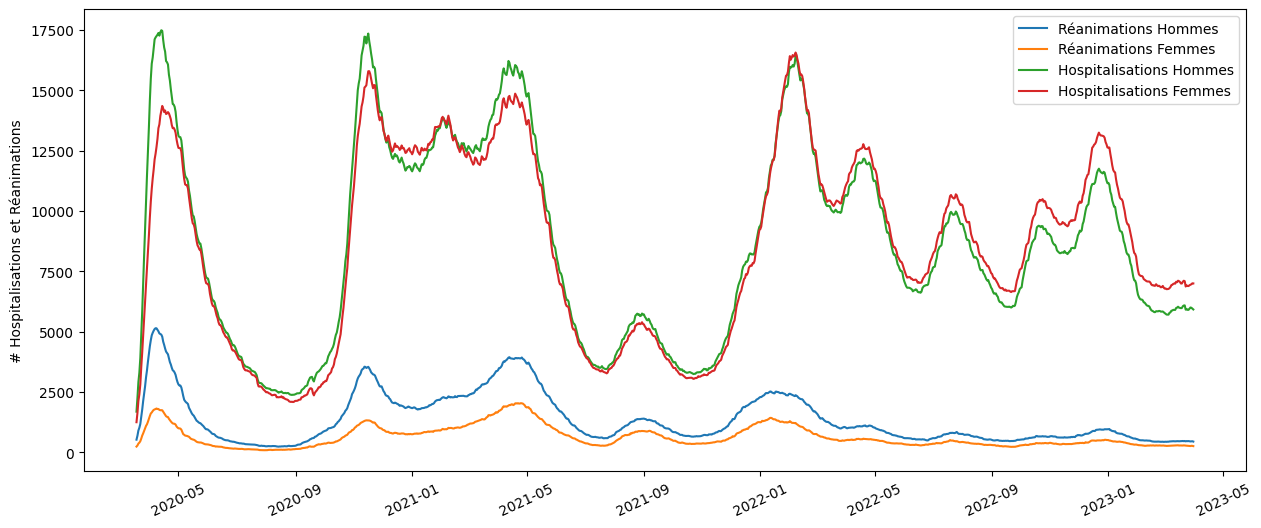

In [12]:
plt.figure(figsize=(15,6)) #figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.plot(df.loc[2:,['Jour']],df.loc[2:,'rea.1'],label='Réanimations Hommes')
plt.plot(df.loc[2:,['Jour']],df.loc[2:,'rea.2'],label='Réanimations Femmes')
plt.plot(df.loc[2:,['Jour']],df.loc[2:,'hosp.1'],label='Hospitalisations Hommes')
plt.plot(df.loc[2:,['Jour']],df.loc[2:,'hosp.2'],label='Hospitalisations Femmes')
plt.ylabel('# Hospitalisations et Réanimations')
plt.xticks(rotation = 25)
plt.legend()
plt.show()

Tracer sut le même graphique le nombre de décès cumulés pour les hommes et pour les femmes, mais sur une échelle verticale différente/sépare (plt.twinx?)


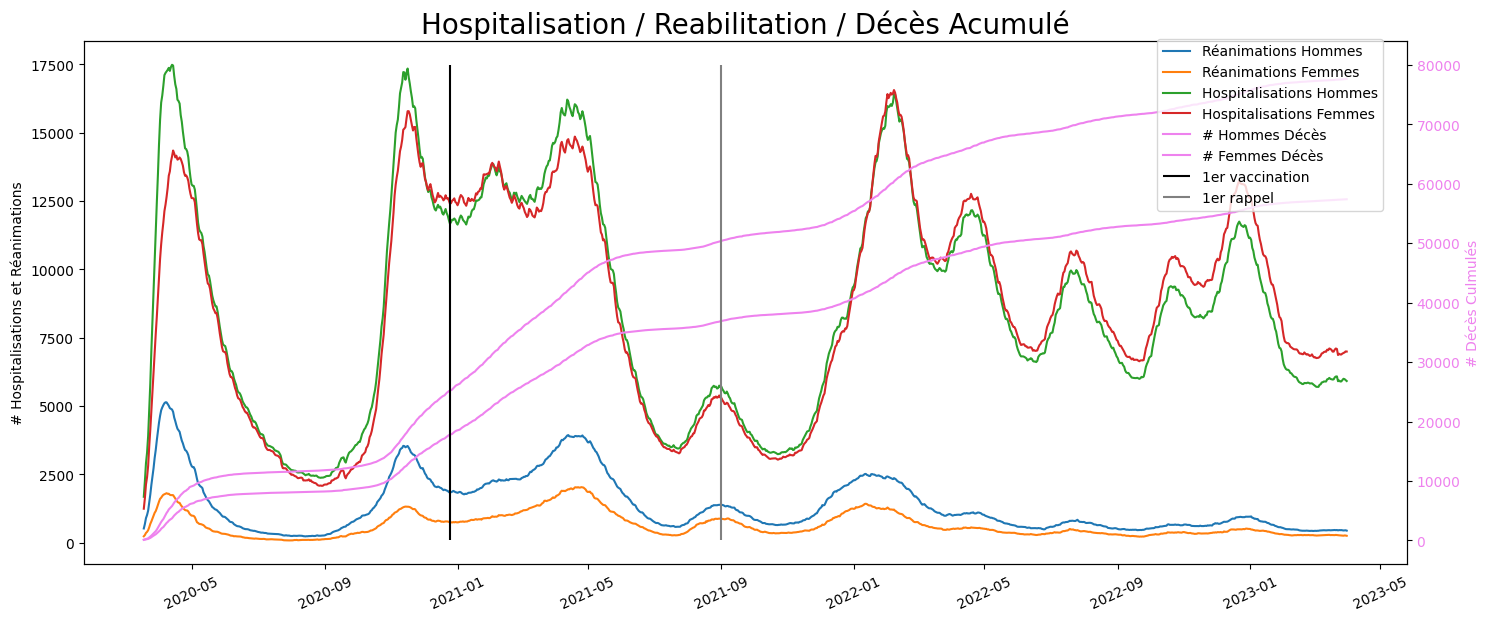

In [13]:
fig, ax = plt.subplots(figsize=(15,6)) # Criar um subplot

ax.plot(df.loc[2:,['Jour']],df.loc[2:,'rea.1'],label='Réanimations Hommes')
ax.plot(df.loc[2:,['Jour']],df.loc[2:,'rea.2'],label='Réanimations Femmes')
ax.plot(df.loc[2:,['Jour']],df.loc[2:,'hosp.1'],label='Hospitalisations Hommes')
ax.plot(df.loc[2:,['Jour']],df.loc[2:,'hosp.2'],label='Hospitalisations Femmes')
ax.set_ylabel('# Hospitalisations et Réanimations')
ax.tick_params(axis='x', labelrotation=25)

ax2 = ax.twinx() # Criar um novo Eixo Y

color = 'violet'
ax2.set_ylabel("# Décès Culmulés",color=color)
ax2.plot(df.loc[2:,['Jour']],df.loc[2:,'dc.1'],label='# Hommes Décès',color=color)
ax2.plot(df.loc[2:,['Jour']],df.loc[2:,'dc.2'],label='# Femmes Décès',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.vlines(df['Jour'][284],0, 80000, colors='black', label = '1er vaccination')
plt.vlines(df['Jour'][534],0, 80000, colors='grey', label = '1er rappel')

fig.tight_layout()
fig.legend(bbox_to_anchor=(0.93,0.99))

plt.rc('axes', titlesize=20)        # Controls Axes Title
plt.rc('axes', labelsize=10)        # Controls Axes Labels
plt.rc('xtick', labelsize=15)       # Controls x Tick Labels
plt.rc('ytick', labelsize=15)       # Controls y Tick Labels
plt.rc('legend', fontsize=12)       # Controls Legend Font
plt.rc('figure', titlesize=10)      # Controls Figure Title
plt.title('Hospitalisation / Reabilitation / Décès Acumulé')
plt.show()

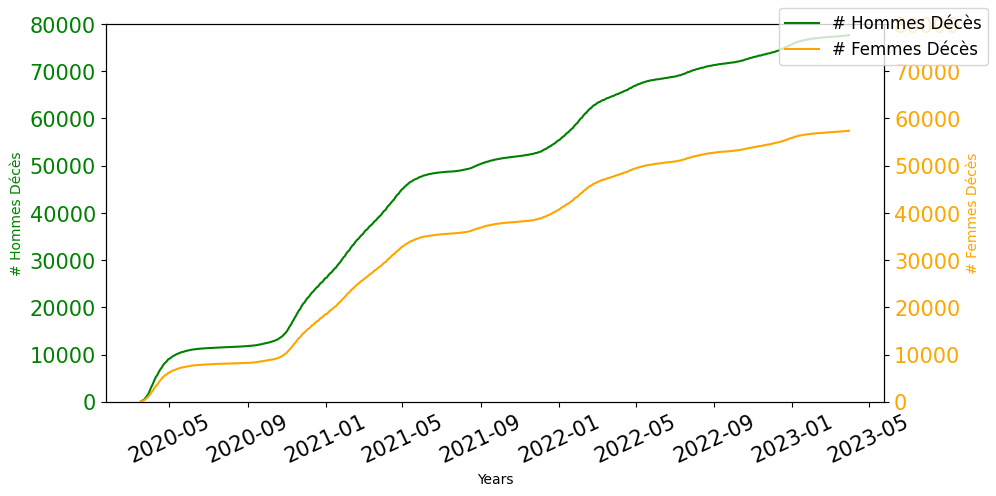

In [61]:
fig, ax = plt.subplots(figsize=(10,5)) # Criar um subplot

color = 'green'
ax.set_xlabel("Years")
ax.set_ylabel("# Hommes Décès",color=color)
ax.set_ylim(0,80000)
ax.plot(df.loc[2:,['Jour']],df.loc[2:,'dc.1'],label='# Hommes Décès',color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.tick_params(axis='x', labelrotation=25)

ax2 = ax.twinx() # Criar um novo Eixo Y

color = 'orange'
ax2.set_xlabel("Years")
ax2.set_ylabel("# Femmes Décès",color=color)
ax2.set_ylim(0,80000)
ax2.plot(df.loc[2:,['Jour']],df.loc[2:,'dc.2'],label='# Femmes Décès',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend()
plt.show()

Quelle est la probabilité pour un Français (vs) une Française de mourir du Covid au début de la période disponible ? à la fin de la période disponible ?


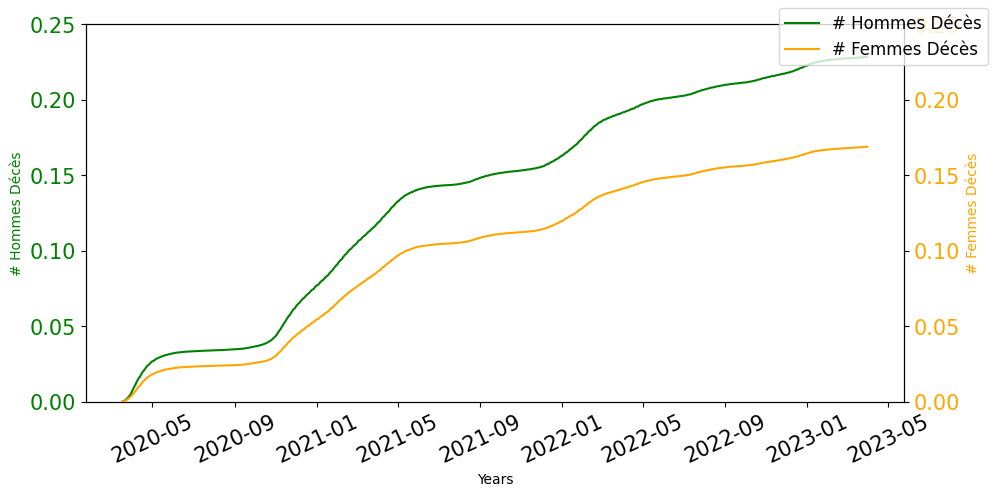

In [15]:
n_francais_2023 = 34000000


df['p_h_dc'] = (df.loc[2:,['dc.1']] / n_francais_2023) * 100
df['p_f_dc'] = (df.loc[2:,['dc.2']] / n_francais_2023) * 100

fig, ax = plt.subplots(figsize=(10,5)) # Criar um subplot

color = 'green'
ax.set_xlabel("Years")
ax.set_ylim(0,0.25)
ax.set_ylabel("# Hommes Décès",color=color)
ax.plot(df.loc[2:,['Jour']],df.loc[2:,'p_h_dc'],label='# Hommes Décès',color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.tick_params(axis='x', labelrotation=25)

ax2 = ax.twinx() # Criar um novo Eixo Y

color = 'orange'
ax2.set_xlabel("Years")
ax2.set_ylim(0,0.25)
ax2.set_ylabel("# Femmes Décès",color=color)
ax2.plot(df.loc[2:,['Jour']],df.loc[2:,'p_f_dc'],label='# Femmes Décès',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend()

plt.show()
